In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# df = pd.read_csv('/Users/lega/Documents/feature_eng_df_multi_cols_3.csv', encoding='utf-8')

In [4]:
df = df.replace('Sri Lank', 'Sri Lanka')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
def remove_pt_o(yr):
    yr = yr.removesuffix('.0')
    return yr

In [7]:
#df['year'] = df['year'].apply(remove_pt_o)

In [8]:
df['year'].unique()

array(['2001.0', '2005.0', '2004.0', '2003.0', '1997.0', '2002.0',
       '2006.0', '1996.0', '2015.0', '2016.0', '2013.0', '2009.0',
       '2010.0', '2012.0', '1999.0', '2011.0', '2007.0', '2014.0',
       '2018.0', nan, '2017.0', '2008.0', '2012', '2011', '2013', '2000',
       '1995', '2005', '2016', '1997', '2007', '2002', '2015', '2006',
       '1999', '2003', '2009', '2004', '2010', '2014', '2017', '2008',
       '2001', 'International', '2018', '1993', '1988', 'M', '2019',
       '1994', 'Narratives,', '1998', '2020'], dtype=object)

In [9]:
df["year"] = df['year'].str.replace('International', '0')

In [10]:
df["year"] = df['year'].str.replace('M', '0')

In [11]:
df["year"] = df['year'].str.replace('Narratives,', '0')

In [12]:
df["year"] = df['year'].fillna('0')

In [13]:
df["year"] = df['year'].astype('float32')

In [14]:
df["year"] = df['year'].astype('int32')

<AxesSubplot:xlabel='year', ylabel='Count'>

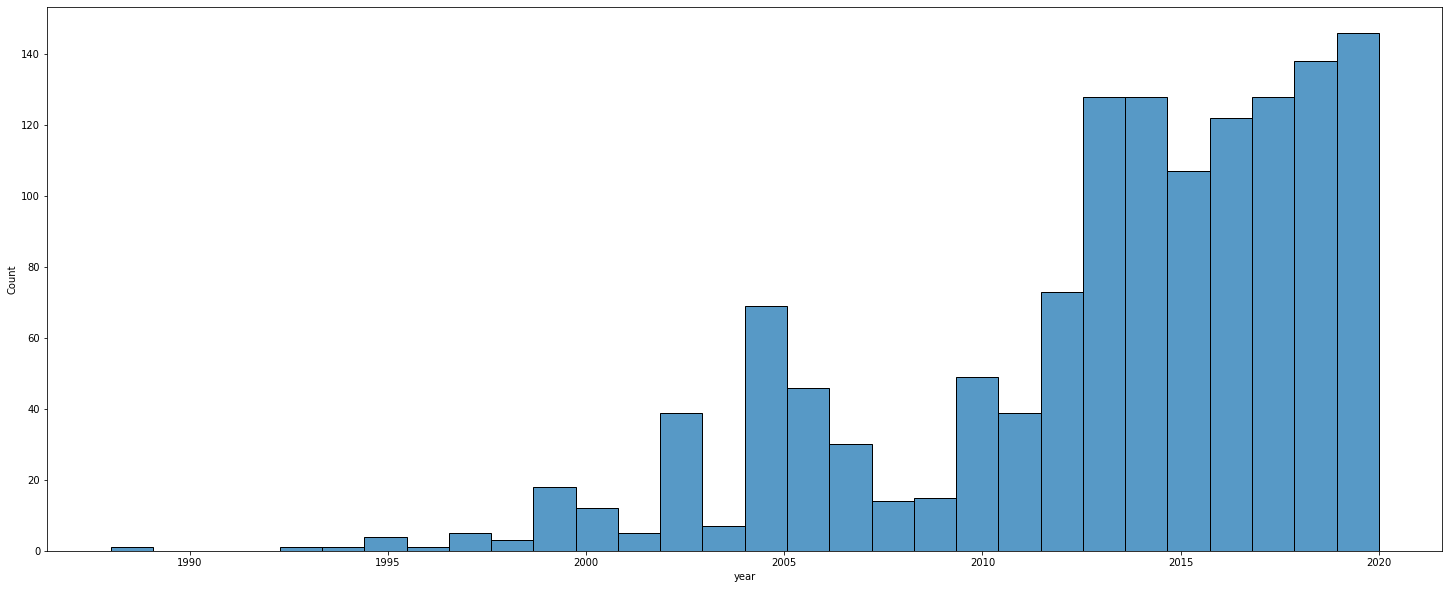

In [15]:
plt.figure(figsize=(25,10))
sns.histplot(df[df['year']!=0]['year'])

In [16]:
df.loc[df['year']==0,'year']=np.nan
#nan does not exist for int

In [17]:
df.dtypes

text             object
name             object
year            float64
departure        object
arrival          object
                 ...   
age_24_to_26     object
age_27_to_29     object
age_30-38        object
age_39_47        object
age_48+          object
Length: 88, dtype: object

In [21]:
df_sliced = df.iloc[:,11:].copy()

In [23]:
def convert_lists(value):
    if value == '[]':
        return 0
    return 1

In [25]:
df_sliced = df_sliced.applymap(convert_lists)

In [26]:
df_start = df.iloc[:,:11]

In [27]:
df_w_ones_zeros = pd.merge(df_start, df_sliced, left_index=True, right_index=True)

In [30]:
ToE_data_bar = pd.DataFrame(df_w_ones_zeros[(df_w_ones_zeros.meansOfControlDebtBondage.notna())].meansOfControlDebtBondage.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0))
ToE_data_bar.sort_values(by=0, ascending=False).head(9)

,0
0,1231.0
1,127.0


In [31]:
df_sliced.sum(axis = 0, skipna = True)

meansOfControlDebtBondage              127
meansOfControlExcessiveWorkingHours    132
meansOfControlRestrictsMedicalCare      27
meansOfControlUsesChildren               0
control_method_witchcraft               39
                                      ... 
age_24_to_26                             5
age_27_to_29                             5
age_30-38                                3
age_39_47                                1
age_48+                                  2
Length: 77, dtype: int64

In [32]:
df_w_ones_zeros.sum(axis = 0, skipna = True)

/var/folders/gk/cx1jhdp95mq5vfdjc2p6l0gc0000gn/T/ipykernel_19445/196077880.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_w_ones_zeros.sum(axis = 0, skipna = True)


text            My name is Vi. And I am 28 years old. I arrive...
year                                                    2675381.0
latitude                                             36300.597196
longitude                                            43463.720699
gender          femalefemalefemalefemalemalemalemalefemaleunkn...
                                      ...                        
age_24_to_26                                                    5
age_27_to_29                                                    5
age_30-38                                                       3
age_39_47                                                       1
age_48+                                                         2
Length: 83, dtype: object

In [33]:
#age concat

In [34]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})

for index, row in df.iterrows():
    print(row)
    print(row['c1'], row['c2'])

c1     10
c2    100
Name: 0, dtype: int64
10 100
c1     11
c2    110
Name: 1, dtype: int64
11 110
c1     12
c2    120
Name: 2, dtype: int64
12 120


In [35]:
dfs = df_sliced.iloc[:,-9:]

In [36]:
dfs.iloc[4:5]

,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+
4,0,1,0,0,0,0,0,0,0


In [37]:
for i,j in dfs.iloc[4:5].iteritems():
    print(j)

4    0
Name: age_0_to_8, dtype: int64
4    1
Name: age_9_to_17, dtype: int64
4    0
Name: age_18_to_20, dtype: int64
4    0
Name: age_21_to_23, dtype: int64
4    0
Name: age_24_to_26, dtype: int64
4    0
Name: age_27_to_29, dtype: int64
4    0
Name: age_30-38, dtype: int64
4    0
Name: age_39_47, dtype: int64
4    0
Name: age_48+, dtype: int64


In [38]:
dfs.iloc[4:5].T

,4
age_0_to_8,0
age_9_to_17,1
age_18_to_20,0
age_21_to_23,0
age_24_to_26,0
age_27_to_29,0
age_30-38,0
age_39_47,0
age_48+,0


In [39]:
dfs.iloc[4:5].T

,4
age_0_to_8,0
age_9_to_17,1
age_18_to_20,0
age_21_to_23,0
age_24_to_26,0
age_27_to_29,0
age_30-38,0
age_39_47,0
age_48+,0


In [40]:
dfs.iloc[0]

age_0_to_8      0
age_9_to_17     0
age_18_to_20    0
age_21_to_23    0
age_24_to_26    0
age_27_to_29    0
age_30-38       0
age_39_47       0
age_48+         0
Name: 0, dtype: int64

In [41]:
dft = dfs.T

In [42]:
dft

,0,1,2,3,4,5,6,7,8,9,...,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357
age_0_to_8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
age_9_to_17,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_18_to_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_21_to_23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_24_to_26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_27_to_29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_30-38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_39_47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_48+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dft.ne

<bound method flex_comp_method_FRAME.<locals>.f of               0     1     2     3     4     5     6     7     8     9     ...  \
age_0_to_8       0     0     0     0     0     0     0     0     1     0  ...   
age_9_to_17      0     0     1     1     1     0     0     0     0     0  ...   
age_18_to_20     0     0     0     0     0     0     0     0     0     0  ...   
age_21_to_23     0     0     0     0     0     0     0     0     0     0  ...   
age_24_to_26     0     0     0     0     0     0     0     0     0     0  ...   
age_27_to_29     0     0     0     0     0     0     0     0     0     0  ...   
age_30-38        0     0     0     0     0     0     0     0     0     0  ...   
age_39_47        0     0     0     0     0     0     0     0     0     0  ...   
age_48+          0     0     0     0     0     0     0     0     0     0  ...   

              1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  
age_0_to_8       0     0     0     0     0     0     0     0   

In [44]:
dft.ne(0).idxmax().to_frame('pos').assign(val=lambda d: dft.lookup(d.pos, d.index))

/var/folders/gk/cx1jhdp95mq5vfdjc2p6l0gc0000gn/T/ipykernel_19445/3168469963.py:1: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  dft.ne(0).idxmax().to_frame('pos').assign(val=lambda d: dft.lookup(d.pos, d.index))


,pos,val
0,age_0_to_8,0
1,age_0_to_8,0
2,age_9_to_17,1
3,age_9_to_17,1
4,age_9_to_17,1
...,...,...
1353,age_0_to_8,0
1354,age_0_to_8,0
1355,age_0_to_8,0
1356,age_0_to_8,0


In [45]:
test = pd.DataFrame({
    'G1':[0,0,0,0,0,0],
    'G2':[0,1,0,0,0,0],
    'G3':[0,1,1,0,0,0],
    'G4':[1,0,0,0,1,0],
    'G5':[0,0,0,0,0,1]
})

In [46]:
test.T

,0,1,2,3,4,5
G1,0,0,0,0,0,0
G2,0,1,0,0,0,0
G3,0,1,1,0,0,0
G4,1,0,0,0,1,0
G5,0,0,0,0,0,1


In [47]:
test.T[1].ne(0).idxmax()

'G2'

In [48]:
dfs.T

,0,1,2,3,4,5,6,7,8,9,...,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357
age_0_to_8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
age_9_to_17,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_18_to_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_21_to_23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_24_to_26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_27_to_29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_30-38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_39_47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
age_48+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
range(0,dfs.shape[0])

range(0, 1358)

In [50]:
list_years = []


for i in range(0,dfs.shape[0]):
    list_years.append(dfs.T[i].ne(0).idxmax())

In [51]:
dfs_ = dfs.copy()
dfs_['ageBroad']=list_years
dfs_.head()

,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+,ageBroad
0,0,0,0,0,0,0,0,0,0,age_0_to_8
1,0,0,0,0,0,0,0,0,0,age_0_to_8
2,0,1,0,0,0,0,0,0,0,age_9_to_17
3,0,1,0,0,0,0,0,0,0,age_9_to_17
4,0,1,0,0,0,0,0,0,0,age_9_to_17


In [52]:
dfs_['ageBroad'].iloc[0]

'age_0_to_8'

In [53]:
for i in range(0,dfs.shape[0]):
    if dfs_.iloc[i,0:-1].sum() == 0:
        dfs_['ageBroad'].iloc[i] = 'Unknown'

/Users/lega/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
dfs_['ageBroad'].value_counts()

Unknown         1014
age_9_to_17      201
age_0_to_8       102
age_18_to_20      24
age_21_to_23       8
age_24_to_26       4
age_27_to_29       2
age_30-38          2
age_39_47          1
Name: ageBroad, dtype: int64

In [55]:
dfs_

,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+,ageBroad
0,0,0,0,0,0,0,0,0,0,Unknown
1,0,0,0,0,0,0,0,0,0,Unknown
2,0,1,0,0,0,0,0,0,0,age_9_to_17
3,0,1,0,0,0,0,0,0,0,age_9_to_17
4,0,1,0,0,0,0,0,0,0,age_9_to_17
...,...,...,...,...,...,...,...,...,...,...
1353,0,0,0,0,0,0,0,0,0,Unknown
1354,0,0,0,0,0,0,0,0,0,Unknown
1355,0,0,0,0,0,0,0,0,0,Unknown
1356,0,0,0,0,0,0,0,0,0,Unknown


In [56]:
age_broad = dfs_.iloc[:,-1:]

In [57]:
age_broad

,ageBroad
0,Unknown
1,Unknown
2,age_9_to_17
3,age_9_to_17
4,age_9_to_17
...,...
1353,Unknown
1354,Unknown
1355,Unknown
1356,Unknown


In [58]:
df_w_age_broad = pd.merge(df_w_ones_zeros, age_broad, left_index=True, right_index=True)

In [59]:
df_w_age_broad

,text,name,year,departure,arrival,theme,latitude,longitude,date_slavery,gender,...,age_0_to_8,age_9_to_17,age_18_to_20,age_21_to_23,age_24_to_26,age_27_to_29,age_30-38,age_39_47,age_48+,ageBroad
0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,Forced labour,-14.354000,-170.773600,NaN,female,...,0,0,0,0,0,0,0,0,0,Unknown
1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lanka,Lebanon,Domestic slavery,33.900000,35.500000,NaN,female,...,0,0,0,0,0,0,0,0,0,Unknown
2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lanka,India,Domestic slavery,24.071318,79.652396,2002-2004,female,...,0,1,0,0,0,0,0,0,0,age_9_to_17
3,I grew up in a village of between 500 and 700 ...,Maria,2005.0,Mexico,United States,Domestic slavery,40.412044,-96.870925,1976-1981,female,...,0,1,0,0,0,0,0,0,0,age_9_to_17
4,"I was living in a village, Karko, in the Nuba ...",Mende,2003.0,Sudan,"['Sudan ', 'United Kingdom ']",War slavery,16.865226,32.271106,1994-2000,male,...,0,1,0,0,0,0,0,0,0,age_9_to_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,"My name is Suleiman Ali, I’m Sudanese. I want ...",Suleiman,2020.0,Egypt,Libya,Trafficking,26.335100,17.228331,NaN,male,...,0,0,0,0,0,0,0,0,0,Unknown
1354,"In Nigeria, it was difficult to make a living....",Shola,2020.0,Nigeria,Libya,too much themes,26.335100,17.228331,NaN,male,...,0,0,0,0,0,0,0,0,0,Unknown
1355,"My name is Seif Eldein. I’m 24 years old, from...",Seif,2020.0,Chad,Libya,"['Trafficking', 'Forced labour']",26.335100,17.228331,NaN,male,...,0,0,0,0,0,0,0,0,0,Unknown
1356,I was begging and sleeping in the street behin...,Rita,2020.0,Nigeria,"['Italy ', 'Libya ']","['Sexual exploitation', 'Trafficking']",43.769562,11.255814,NaN,female,...,0,0,0,0,0,0,0,0,0,Unknown


In [60]:
df_w_age_broad.iloc[:,30:45]

,rec_method_online,rec_method_recagency,recruiterRelationIntimatePartner,recruiterRelationFamily,rec_method_social_media,traf_type_child,isSexualExploit,isForcedLabour,isForcedMarriage,traf_type_cmarriage,traf_type_domestic,traf_type_fcriminality,isForcedMilitary,traf_type_fpregnancy,traf_type_illegaladoption
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1354,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1356,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [61]:
# df_w_age_broad.to_csv('/Users/lega/Documents/df_year_cleaned_and_age_groups.csv', index=False)

In [62]:
df_w_age_broad.shape

(1358, 89)

In [63]:
df_w_age_broad.columns

Index(['text', 'name', 'year', 'departure', 'arrival', 'theme', 'latitude',
       'longitude', 'date_slavery', 'gender', 'accuracy',
       'meansOfControlDebtBondage', 'meansOfControlExcessiveWorkingHours',
       'meansOfControlRestrictsMedicalCare', 'meansOfControlUsesChildren',
       'control_method_witchcraft', 'meansOfControlPhysicalAbuse',
       'meansOfControlPsychologicalAbuse',
       'meansOfControlRestrictsFinancialAccess',
       'meansOfControlRestrictsMovement', 'meansOfControlSexualAbuse',
       'meansOfControlTakesEarnings', 'meansOfControlThreatOfLawEnforcement',
       'meansOfControlThreats', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlWithholdsDocuments',
       'meansOfControlWithholdsNecessities', 'meansOfControlFalsePromises',
       'RecruiterRelationship', 'isAbduction', 'rec_method_online',
       'rec_method_recagency', 'recruiterRelationIntimatePartner',
       'recruiterRelationFamily', 'rec_method_social_media', 'traf_type_child',
  

In [89]:
# pd.read_csv('/Users/lega/Downloads/final_df_26_11 (1).csv')

In [65]:
# loc_dat = pd.read_csv('/Users/lega/Downloads/final_df_26_11 (1).csv')

In [66]:
loc_dat.groupby(['departure','arrival_1']).size().reset_index().rename(columns={0:'count'})

,departure,arrival_1,count
0,Afghanistan,Afghanistan,1
1,Afghanistan,Cambodia,1
2,Afghanistan,United Kingdom,1
3,Albania,Albania,2
4,Albania,Belgium,4
...,...,...,...
327,Yemen,Yemen,18
328,Zambia,United States,2
329,Zimbabwe,Lebanon,1
330,Zimbabwe,South Africa,1


In [67]:
sankey_df = loc_dat.groupby(['departure','arrival_1']).size().reset_index().rename(columns={0:'count'})

In [68]:
sankey_df.sort_values(by='count', ascending=False)

,departure,arrival_1,count
93,India,India,157
310,United States,United States,115
105,Indonesia,Hong Kong,42
250,Sudan,Sudan,40
192,North Korea,China,26
...,...,...,...
153,Mexico,Malaysia,1
155,Mexico,Pakistan,1
156,Mexico,Russia,1
160,Moldova,Turkey,1


In [69]:
sankey_df = sankey_df.sort_values(by='count', ascending=False).head(25)

In [70]:
unique_contries = np.unique(sankey_df.departure.to_list() + sankey_df.arrival_1.to_list())

In [71]:
map_countries = {unique_contries[i] : i for i in range(len(unique_contries))}

In [72]:
sankey_df["departure_code"] = sankey_df.departure.map(map_countries)+100
sankey_df["arrival_code"] = sankey_df.arrival_1.map(map_countries)

In [73]:
sankey_df

,departure,arrival_1,count,departure_code,arrival_code
93,India,India,157,106,6
310,United States,United States,115,122,22
105,Indonesia,Hong Kong,42,107,5
250,Sudan,Sudan,40,120,20
192,North Korea,China,26,115,3
167,Nepal,Nepal,18,113,13
327,Yemen,Yemen,18,123,23
239,Sri Lanka,Saudi Arabia,16,119,17
158,Mexico,United States,16,112,22
184,Nigeria,Nigeria,16,114,14


In [74]:
sankey_df['dep'] = sankey_df['departure'] + ' '
sankey_df

,departure,arrival_1,count,departure_code,arrival_code,dep
93,India,India,157,106,6,India
310,United States,United States,115,122,22,United States
105,Indonesia,Hong Kong,42,107,5,Indonesia
250,Sudan,Sudan,40,120,20,Sudan
192,North Korea,China,26,115,3,North Korea
167,Nepal,Nepal,18,113,13,Nepal
327,Yemen,Yemen,18,123,23,Yemen
239,Sri Lanka,Saudi Arabia,16,119,17,Sri Lanka
158,Mexico,United States,16,112,22,Mexico
184,Nigeria,Nigeria,16,114,14,Nigeria


In [75]:
# sankey_df['arr'] = sankey_df['arrival_1'] + ' ' + '(EL)'
# sankey_df

In [76]:
# !pip install chart-studio

In [77]:
import json, urllib
from chart_studio import plotly as py
import pandas as pd
import numpy as np
from plotly.offline import iplot

import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

In [78]:
sankey_df['count']

93     157
310    115
105     42
250     40
192     26
167     18
327     18
239     16
158     16
184     16
206     16
147     13
40      12
41      11
109     11
75      11
296     11
212     11
21      10
189     10
9       10
163      9
122      9
57       9
18       8
Name: count, dtype: int64

In [79]:
len(sankey_df)

25

In [88]:
#Sankey diagram from subset of scraped data
import pandas as pd
import numpy as np
import plotly.graph_objects as go

nodes = np.unique(sankey_df[["dep","arrival_1"]], axis=None)
nodes = pd.Series(index=nodes, data=range(len(nodes)))

go.Figure(
    go.Sankey(
        node={"label": nodes.index},
        link={
            "source": nodes.loc[sankey_df["dep"]],
            "target": nodes.loc[sankey_df["arrival_1"]],
            "value": sankey_df["count"],
        },
    )
)

In [86]:
#additional template code for Sankey
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [2, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [1, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()